# Assigment 2: Deep Learning

## Generate Dataset

This is the same code from Assignment 1

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)


## Visualize Dataset
This is the same code from Assignment 1

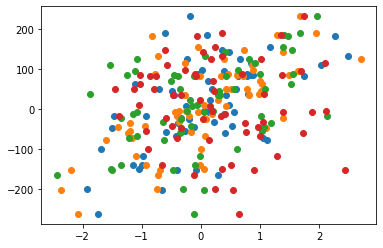

In [2]:
import matplotlib.pyplot as plt

# Your code here
for i in range(1,5):
  plt.scatter(X_train[:,i-1],y_train)

## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [5]:
import tensorflow as tf
import keras

# Your code here
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(5,)),
    keras.layers.Dense(5, activation=tf.nn.relu),
	keras.layers.Dense(5, activation=tf.nn.relu),
    keras.layers.Dense(1),
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
2/2 [==============================] - 0s 103ms/step - loss: 11357.2617 - accuracy: 0.0000e+00 - val_loss: 11758.5664 - val_accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 30ms/step - loss: 11354.8926 - accuracy: 0.0000e+00 - val_loss: 11756.9033 - val_accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 23ms/step - loss: 11352.7051 - accuracy: 0.0000e+00 - val_loss: 11755.2324 - val_accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 28ms/step - loss: 11350.2988 - accuracy: 0.0000e+00 - val_loss: 11753.6562 - val_accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 26ms/step - loss: 11348.2832 - accuracy: 0.0000e+00 - val_loss: 11752.0742 - val_accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 24ms/step - loss: 11346.2910 - accuracy: 0.0000e+00 - val_loss: 11750.4756 - val_accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 23ms/step

2/2 [==============================] - 0s 21ms/step - loss: 11231.8164 - accuracy: 0.0000e+00 - val_loss: 11658.7715 - val_accuracy: 0.0000e+00
Epoch 54/100
2/2 [==============================] - 0s 29ms/step - loss: 11229.0938 - accuracy: 0.0000e+00 - val_loss: 11656.2324 - val_accuracy: 0.0000e+00
Epoch 55/100
2/2 [==============================] - 0s 34ms/step - loss: 11225.9414 - accuracy: 0.0000e+00 - val_loss: 11653.7129 - val_accuracy: 0.0000e+00
Epoch 56/100
2/2 [==============================] - 0s 39ms/step - loss: 11222.8398 - accuracy: 0.0000e+00 - val_loss: 11651.2070 - val_accuracy: 0.0000e+00
Epoch 57/100
2/2 [==============================] - 0s 24ms/step - loss: 11219.9473 - accuracy: 0.0000e+00 - val_loss: 11648.5781 - val_accuracy: 0.0000e+00
Epoch 58/100
2/2 [==============================] - 0s 19ms/step - loss: 11216.6191 - accuracy: 0.0000e+00 - val_loss: 11645.9727 - val_accuracy: 0.0000e+00
Epoch 59/100
2/2 [==============================] - 0s 19ms/step - loss

## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

In [4]:
# Your code here
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

                 

NameError: name 'history' is not defined

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [6]:
# Insert the function for R2 Score
import numpy as np
def r2_score(y_true, y_pred):
      # return the r2 score
      return 1-((np.sum(np.square(y_true-y_pred)))/(np.sum(np.square(y_true-(np.mean(y_true))))))
predictions= model.predict(X_test)
r2=r2_score(predictions, y_test)
r2

1/1 [==============================] - 0s 55ms/step


-70504.31776374676

## Your own custom model
Build a custom model of your own choice.<br>
Describe it in detail in Markdown/Latex in the cell below.<br>
Visualise the loss, as before.

Your text here

In [9]:
# Your code here

In [7]:
import pandas as pd
data = pd.read_csv(r'C:\Users\VEDANT ADLAK\CODING\Power.csv')
x = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

In [8]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=1234)
x_train, x_val, Y_train, Y_val = train_test_split(x_train, Y_train, test_size=0.2, random_state=1)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units=6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units=6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units=1))

In [12]:
ann.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
gr=ann.fit(x_train, Y_train,  epochs=100, validation_data=(x_val, Y_val))

Epoch 1/100
192/192 [==============================] - 1s 1ms/step - loss: 205502.0625 - val_loss: 1055491.3750
Epoch 2/100
192/192 [==============================] - 0s 1ms/step - loss: 190986.4688 - val_loss: 217513104.0000
Epoch 3/100
192/192 [==============================] - 0s 2ms/step - loss: 118311.9766 - val_loss: 4483321856.0000
Epoch 4/100
192/192 [==============================] - 0s 1ms/step - loss: 34966.2695 - val_loss: 7665159680.0000
Epoch 5/100
192/192 [==============================] - 0s 2ms/step - loss: 14791.5361 - val_loss: 5248251904.0000
Epoch 6/100
192/192 [==============================] - 0s 1ms/step - loss: 10338.5312 - val_loss: 4176272384.0000
Epoch 7/100
192/192 [==============================] - 0s 1ms/step - loss: 7680.7041 - val_loss: 3463756800.0000
Epoch 8/100
192/192 [==============================] - 0s 1ms/step - loss: 5623.4736 - val_loss: 2978657280.0000
Epoch 9/100
192/192 [==============================] - 0s 1ms/step - loss: 4070.7275 - val_

Epoch 74/100
192/192 [==============================] - 0s 948us/step - loss: 20.9405 - val_loss: 434460960.0000
Epoch 75/100
192/192 [==============================] - 0s 953us/step - loss: 20.8470 - val_loss: 440190688.0000
Epoch 76/100
192/192 [==============================] - 0s 979us/step - loss: 20.8279 - val_loss: 430655072.0000
Epoch 77/100
192/192 [==============================] - 0s 937us/step - loss: 20.7440 - val_loss: 426091136.0000
Epoch 78/100
192/192 [==============================] - 0s 942us/step - loss: 20.9498 - val_loss: 434446048.0000
Epoch 79/100
192/192 [==============================] - 0s 953us/step - loss: 20.9132 - val_loss: 437293984.0000
Epoch 80/100
192/192 [==============================] - 0s 922us/step - loss: 21.0839 - val_loss: 439511328.0000
Epoch 81/100
192/192 [==============================] - 0s 952us/step - loss: 20.8824 - val_loss: 438428736.0000
Epoch 82/100
192/192 [==============================] - 0s 923us/step - loss: 20.8845 - val_loss

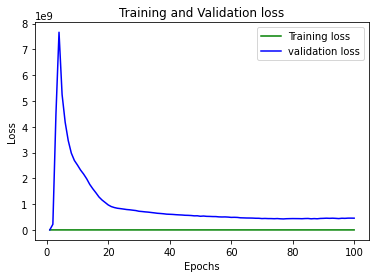

In [14]:
loss_train = gr.history['loss']
loss_val =gr.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
prediction= ann.predict(x_test)
r2=r2_score(prediction, Y_test)
r2

60/60 [==============================] - 0s 642us/step


-4000.5717946760174